In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.18.0'

In [4]:
keras.__version__

'3.8.0'

In [5]:
# For some reason training on the GPU is slow and causes the loss to diverge...
tf.config.set_visible_devices(tf.config.get_visible_devices('CPU'))
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
# Use first 5000 images for validation, and normalise pixels to [0,1]
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [12]:
class_names[y_valid[0]]

'Ankle Boot'

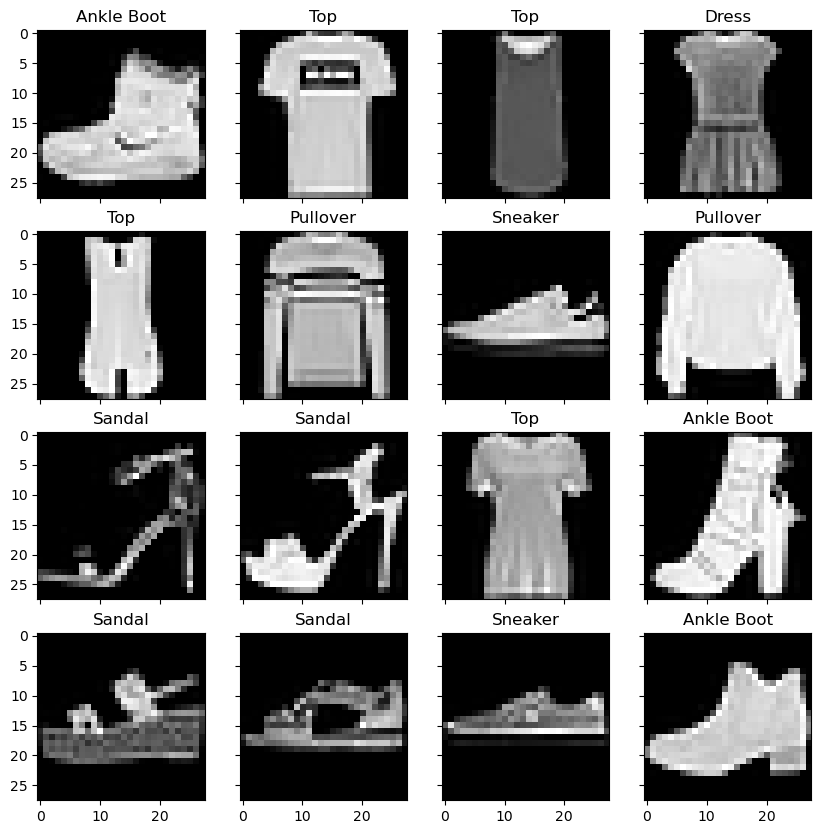

In [13]:
n = 4
fig, axs = plt.subplots(n, n, sharex=True, sharey=True, figsize=(10, 10))

for idx, img in enumerate(X_train_full[:n**2]):
  ax = axs[divmod(idx, n)]
  ax.imshow(img, cmap="grey")
  ax.title.set_text(class_names[y_train_full[idx]])

In [63]:
from keras import models, layers, activations, utils, losses, optimizers, metrics, callbacks, wrappers

In [15]:
model = models.Sequential([ # Stack of layers
  layers.Flatten(input_shape=[28, 28]), # Converts 2D array to 1D array
  layers.Dense(300, activation=activations.relu),
  layers.Dense(100, activation=activations.relu),
  layers.Dense(10, activation=activations.softmax), # Convert output to prob dist w/ 10 classes
])

/Users/mike/Projects/hands-on-ml/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.layers[1].get_weights()

[array([[-0.06573521,  0.07349099, -0.07329831, ..., -0.03593684,
          0.06541389,  0.03199778],
        [ 0.01972044,  0.04680216,  0.03672243, ...,  0.04340577,
          0.0559051 , -0.03294941],
        [ 0.02738509,  0.03006561,  0.04186859, ..., -0.04900029,
          0.05054268, -0.06142377],
        ...,
        [-0.03837945,  0.07391216,  0.0269251 , ..., -0.04970601,
         -0.05656359, -0.0666949 ],
        [ 0.03561541,  0.05584519,  0.0490751 , ..., -0.03019272,
          0.00474975,  0.03158184],
        [-0.06378869,  0.03907197,  0.0307188 , ..., -0.03448005,
         -0.04356701,  0.05947185]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
model.compile(
  loss=losses.SparseCategoricalCrossentropy(),
  optimizer=optimizers.SGD(),
  metrics=[metrics.SparseCategoricalAccuracy()],
)

In [20]:
import joblib
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))
# history = joblib.load("Chapter 10/history")

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 1.0288 - sparse_categorical_accuracy: 0.6737 - val_loss: 0.5429 - val_sparse_categorical_accuracy: 0.8134
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - loss: 0.5100 - sparse_categorical_accuracy: 0.8236 - val_loss: 0.4431 - val_sparse_categorical_accuracy: 0.8544
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 0.4577 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.4277 - val_sparse_categorical_accuracy: 0.8508
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 0.4303 - sparse_categorical_accuracy: 0.8479 - val_loss: 0.4049 - val_sparse_categorical_accuracy: 0.8654
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 0.4045 - sparse_categorical_accuracy: 0.8585 - val_loss: 0.3839 - val_sparse_categorical_accuracy: 0.8674
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - loss: 0.3823 - sparse_categorical_accuracy: 0.8657 - val_loss: 0.3703 - val_sparse_categoric

In [21]:
joblib.dump(history, "Chapter 10/history")

['Chapter 10/history']

In [22]:
model.save("Chapter 10/model.keras")

<Axes: >

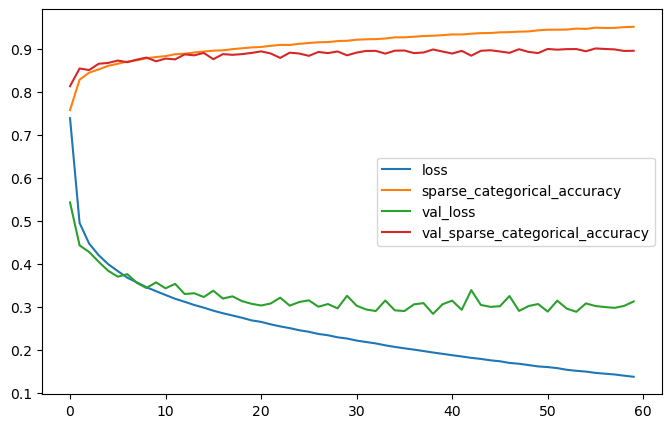

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))

In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 82.6493 - sparse_categorical_accuracy: 0.8486


[85.2217788696289, 0.8464000225067139]

In [26]:
X_new = X_test[:3]
y_new = y_test[:3]
model.predict(X_new).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


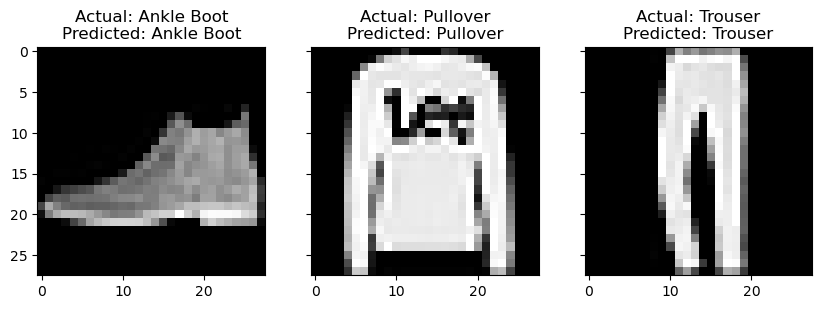

In [27]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10, 10))
y_pred = np.array(class_names)[np.argmax(model.predict(X_new), axis=1)]

for idx, img in enumerate(X_new):
  ax = axs[idx]
  ax.imshow(img, cmap="grey")
  ax.title.set_text(f'Actual: {class_names[y_new[idx]]}\nPredicted: {y_pred[idx]}')

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Regression MLP

In [ ]:
model = models.Sequential([
  layers.Dense(30, activation=activations.relu, input_shape=X_train.shape[1:]), # Small number of neurons to avoid overfitting
  layers.Dense(1), # Single output for regression
])
model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.SGD())
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1.2296 - val_loss: 0.5536
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.6462 - val_loss: 0.5027
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4849 - val_loss: 0.4681
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.4746 - val_loss: 0.4576
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.4641 - val_loss: 0.4430
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.4332 - val_loss: 0.4519
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.4175 - val_loss: 0.4334
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.3976 - val_loss: 0.4283
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.4307 - val_loss: 0.4227
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.4086 - val_loss: 0.4164
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.4219 - val_loss: 0.4131
Epoch 12/20
363/363 ━━━━━━━━━━

In [32]:
model.evaluate(X_valid, y_valid)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.3814


0.38922250270843506

In [33]:
y_test[:3], model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(array([5.00001, 0.718  , 4.569  ]),
 array([[2.9861927 ],
        [0.83896697],
        [2.636505  ]], dtype=float32))

## Wide and Deep Neural Network

In [34]:
import os, time

input_ = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation=activations.relu)(input_)
hidden2 = layers.Dense(30, activation=activations.relu)(hidden1)
concat = layers.Concatenate()([input_, hidden2])
output = layers.Dense(1)(concat)
model = models.Model(inputs=[input_], outputs=[output])

model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.SGD(learning_rate=1e-4))
history = model.fit(
  X_train,
  y_train,
  epochs=500,
  validation_data=(X_valid, y_valid),
  callbacks=[
    callbacks.ModelCheckpoint("Chapter 10/wide-and-deep.keras", save_best_only=True),
    callbacks.EarlyStopping(patience=10, min_delta=1e-3, restore_best_weights=True),
    callbacks.TensorBoard(os.path.join(os.curdir, "Chapter 10", time.strftime("run_%Y_%m_%d-%H-%M-%S")))
  ]
)

Epoch 1/500
263/363 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 5.0153

/Users/mike/Projects/hands-on-ml/env/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 5.0032 - val_loss: 3.7480
Epoch 2/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 3.1892 - val_loss: 2.5229
Epoch 3/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 2.5585 - val_loss: 1.7674
Epoch 4/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 1.7475 - val_loss: 1.3499
Epoch 5/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 1.4468 - val_loss: 1.1206
Epoch 6/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 1.1196 - val_loss: 0.9956
Epoch 7/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.9746 - val_loss: 0.9223
Epoch 8/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.9187 - val_loss: 0.8764
Epoch 9/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.8800 - val_loss: 0.8446
Epoch 10/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.8359 - val_loss: 0.8210
Epoch 11/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.8225 - val_loss: 0.8022
Epoch 12/500
363/363 ━━━━━━━━━━

In [36]:
%load_ext tensorboard
%tensorboard --logdir="./Chapter 10" --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11999), started 0:00:13 ago. (Use '!kill 11999' to kill it.)

In [37]:
writer = tf.summary.create_file_writer(os.path.join(os.curdir, "Chapter 10", time.strftime("writer_%Y_%m_%d-%H-%M-%S")))
with writer.as_default():
  for step in range(1, 1001):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    tf.summary.histogram("my_hist", (np.random.randn(100) + 2) * step / 100, buckets=50, step=step)
    tf.summary.image("my_images", np.random.rand(2, 32, 32, 3), step=step)
    tf.summary.text("my_text", f"The step is {step}", step=step)
    tf.summary.audio(
      "my_audio",
      tf.reshape(
        tf.cast(
          tf.math.sin(tf.range(12_000) / 48_000 * 2 * np.pi * step),
          tf.float32,
        ),
        [1, -1, 1],
      ),
      sample_rate=48_000,
      step=step,
    )

In [ ]:
import keras_tuner as kt

def build_model(hp: kt.HyperParameters):
  n_layers = hp.Int("n_layers", min_value=0, max_value=3)
  n_neurons = hp.Int("n_neurons", min_value=1, max_value=100)
  learning_rate = hp.Float("learning_rate", min_value=3e-4, max_value=3e-2)

  model = models.Sequential()
  model.add(layers.InputLayer(input_shape=[8]))

  for _ in range(n_layers):
    model.add(layers.Dense(n_neurons, activation=activations.relu))
  
  model.add(layers.Dense(1))

  model.compile(optimizer=optimizers.SGD(learning_rate=learning_rate), loss=losses.mean_squared_error, metrics=[metrics.mean_absolute_error])

  return model

build_model(kt.HyperParameters())

tuner = kt.RandomSearch(
  hypermodel=build_model,
  objective="mean_absolute_error",
  directory="Chapter 10/random search",
  overwrite=True,
)
tuner.search_space_summary()

tuner.search(
  X_train,
  y_train,
  epochs=300,
  validation_data=(X_valid, y_valid),
  callbacks=[callbacks.EarlyStopping(patience=10)],
)

## Exercise 10

In [102]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

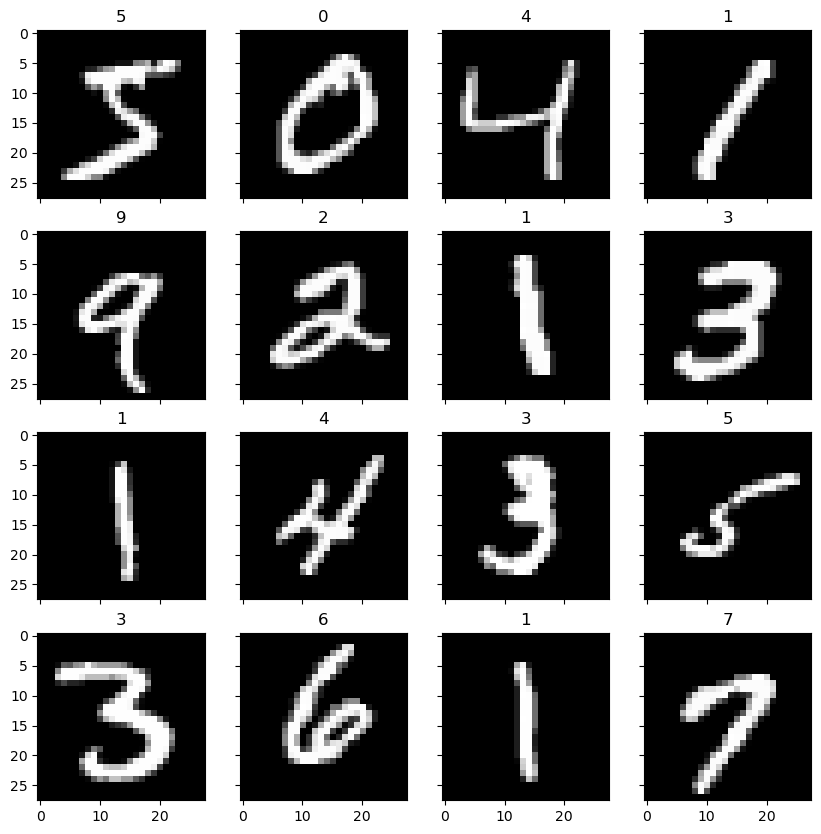

In [8]:
n = 4
fig, axs = plt.subplots(n, n, sharex=True, sharey=True, figsize=(10, 10))

for idx, img in enumerate(x_train[:n**2]):
  ax = axs[divmod(idx, n)]
  ax.imshow(img, cmap="grey")
  ax.title.set_text(y_train[idx])


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_layers = 2, n_neurons=300, learning_rate=1e-5):
  model = models.Sequential()
  model.add(layers.Input(shape=(28, 28)))
  model.add(layers.Flatten())

  for _ in range(n_layers):
    model.add(layers.Dense(n_neurons, activation=activations.relu))

  model.add(layers.Dense(10, activation=activations.softmax))

  model.compile(optimizer=optimizers.SGD(learning_rate=learning_rate), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  return model

build_model()

<Sequential name=sequential_494, built=True>

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.1741 - loss: nan
optimal learning rate: 0.00222654826939106


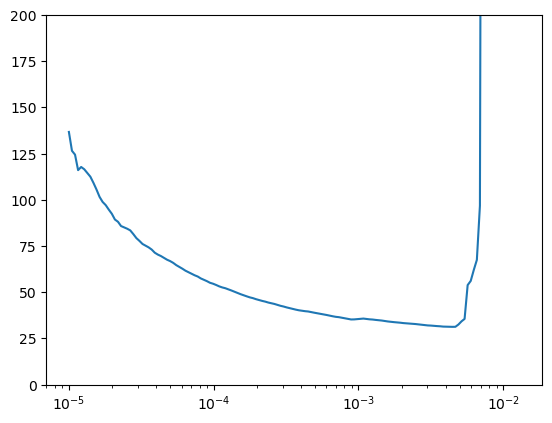

In [106]:
history = {
  "learning_rates": [],
  "losses": [],
}

class LossCallback(callbacks.Callback):
  def on_batch_end(self, epoch, logs=None):
    lr = self.model.optimizer.learning_rate.numpy()
    self.model.optimizer.learning_rate = lr * 1.05
    history["learning_rates"].append(lr)
    history["losses"].append(logs["loss"])

# for learning_rate in [1e-5 * 10**(6 * i/20) for i in range(0, 20)]:
# print(f"learning rate: {learning_rate}")
model = build_model()
model.fit(
  x_train,
  y_train,
  epochs=1,
  callbacks=[LossCallback()]
)

# print(histories)
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_ylim([0, 200])
ax.plot(history["learning_rates"], history["losses"])
print("optimal learning rate: " + str(history["learning_rates"][np.nanargmin(history["losses"])] / 2))

In [111]:
model = build_model(learning_rate=0.00222654826939106)
model.fit(
  x_train,
  y_train,
  epochs=100,
  validation_split=0.2,
  callbacks=[
    callbacks.EarlyStopping(patience=20),
    callbacks.ModelCheckpoint("Chapter 10/mnist/models.keras"),
    callbacks.TensorBoard("Chapter 10/mnist/logs")
  ]
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7224 - loss: 12.1657 - val_accuracy: 0.9112 - val_loss: 0.3891
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9122 - loss: 0.3518 - val_accuracy: 0.9308 - val_loss: 0.2857
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.9351 - loss: 0.2358 - val_accuracy: 0.9368 - val_loss: 0.2572
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.9518 - loss: 0.1697 - val_accuracy: 0.9423 - val_loss: 0.2433
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9605 - loss: 0.1384 - val_accuracy: 0.9442 - val_loss: 0.2398
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9642 - loss: 0.1187 - val_accuracy: 0.9448 - val_loss: 0.2401
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9698 - loss: 0.1010 - val_accuracy: 0.9460 - val_loss: 0.2364
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9732 

In [112]:
model.metrics_names, model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9470 - loss: 0.3084


(['loss', 'compile_metrics'], [0.28574830293655396, 0.9520000219345093])